In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv("/content/drive/MyDrive/ML/Cellphone_clustering.csv")

In [8]:
df.head()

,Unnamed: 0,product_id,main_cat,overall,reviewTime,reviewerID,Review,Month,Year,day,Rank
0,0,7532385086,cell phones accessories,5.0,2011-02-02,A2G38P52ZF5TTH,love case prettyand love way case feels touch ...,2.0,2011.0,2.0,553803 100 275153
1,1,7532385086,cell phones accessories,3.0,2012-02-02,A3Q6C95EFP4FEX,idea design sweet idea wears paint case sealan...,2.0,2012.0,2.0,553803 100 275153
2,2,7532385086,cell phones accessories,5.0,2012-07-18,A2GHDKZBYXGAPY,worried order picture description page kept ch...,7.0,2012.0,18.0,553803 100 275153
3,3,7532385086,cell phones accessories,5.0,2013-02-15,A2Y33PMFKII0VR,another pretty phone case really love many lov...,2.0,2013.0,15.0,553803 100 275153
4,4,7532385086,cell phones accessories,4.0,2012-12-08,A3S8BPAUQQLDKU,case white silver still pretty case fit phone ...,12.0,2012.0,8.0,553803 100 275153


In [9]:
df.shape

(44847, 11)

In [10]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [11]:
df.dropna()

,product_id,main_cat,overall,reviewTime,reviewerID,Review,Month,Year,day,Rank
0,7532385086,cell phones accessories,5.0,2011-02-02,A2G38P52ZF5TTH,love case prettyand love way case feels touch ...,2.0,2011.0,2.0,553803 100 275153
1,7532385086,cell phones accessories,3.0,2012-02-02,A3Q6C95EFP4FEX,idea design sweet idea wears paint case sealan...,2.0,2012.0,2.0,553803 100 275153
2,7532385086,cell phones accessories,5.0,2012-07-18,A2GHDKZBYXGAPY,worried order picture description page kept ch...,7.0,2012.0,18.0,553803 100 275153
3,7532385086,cell phones accessories,5.0,2013-02-15,A2Y33PMFKII0VR,another pretty phone case really love many lov...,2.0,2013.0,15.0,553803 100 275153
4,7532385086,cell phones accessories,4.0,2012-12-08,A3S8BPAUQQLDKU,case white silver still pretty case fit phone ...,12.0,2012.0,8.0,553803 100 275153
...,...,...,...,...,...,...,...,...,...,...
44842,B008N8KSOY,cell phones accessories,2.0,2014-02-09,A3O13RBA3G64VN,cute case sturdy reliable phone fell screen br...,2.0,2014.0,9.0,494634 100 1831
44843,B008N8KSOY,cell phones accessories,5.0,2013-02-04,A369E3SLQ3UBUX,great gift lady life got one girl friend think...,2.0,2013.0,4.0,494634 100 1831
44844,B008N8KSOY,cell phones accessories,4.0,2013-03-26,A1M2O2U08T5FPX,thought pink color would like realistic well c...,3.0,2013.0,26.0,494634 100 1831
44845,B008N8KSOY,cell phones accessories,5.0,2014-05-04,AEAFHD09X8044,quality superb rubber extra thick chain metal ...,5.0,2014.0,4.0,494634 100 1831


In [16]:
df.isnull().sum()

product_id       0
main_cat         0
overall          0
reviewTime       0
reviewerID       0
Review           2
Month            0
Year             0
day              0
Rank          4238
dtype: int64

In [17]:
df.dtypes

product_id     object
main_cat       object
overall       float64
reviewTime     object
reviewerID     object
Review         object
Month         float64
Year          float64
day           float64
Rank           object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44847 entries, 0 to 44846
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  44847 non-null  object 
 1   main_cat    44847 non-null  object 
 2   overall     44847 non-null  float64
 3   reviewTime  44847 non-null  object 
 4   reviewerID  44847 non-null  object 
 5   Review      44845 non-null  object 
 6   Month       44847 non-null  float64
 7   Year        44847 non-null  float64
 8   day         44847 non-null  float64
 9   Rank        40609 non-null  object 
dtypes: float64(4), object(6)
memory usage: 3.4+ MB


In [13]:
df.corr()

,overall,Month,Year,day
overall,1.000000,-0.001395,0.019238,0.006714
Month,-0.001395,1.000000,-0.269683,0.046127
Year,0.019238,-0.269683,1.000000,-0.038188
day,0.006714,0.046127,-0.038188,1.000000


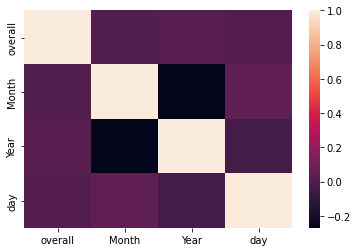

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr())
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['main_cat'] = labelencoder.fit_transform(df['main_cat'])
df.head()

,product_id,main_cat,overall,reviewTime,reviewerID,Review,Month,Year,day,Rank
0,7532385086,6,5.0,2011-02-02,A2G38P52ZF5TTH,love case prettyand love way case feels touch ...,2.0,2011.0,2.0,553803 100 275153
1,7532385086,6,3.0,2012-02-02,A3Q6C95EFP4FEX,idea design sweet idea wears paint case sealan...,2.0,2012.0,2.0,553803 100 275153
2,7532385086,6,5.0,2012-07-18,A2GHDKZBYXGAPY,worried order picture description page kept ch...,7.0,2012.0,18.0,553803 100 275153
3,7532385086,6,5.0,2013-02-15,A2Y33PMFKII0VR,another pretty phone case really love many lov...,2.0,2013.0,15.0,553803 100 275153
4,7532385086,6,4.0,2012-12-08,A3S8BPAUQQLDKU,case white silver still pretty case fit phone ...,12.0,2012.0,8.0,553803 100 275153


**# Data scaling**

In [13]:
df_final=df
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_columns =["overall",'main_cat','Month','Year']
df_final[scale_columns] = std_scaler.fit_transform(df_final[scale_columns])
df_final.head()

,product_id,main_cat,overall,reviewTime,reviewerID,Review,Month,Year,day,Rank
0,7532385086,-0.019983,0.757483,2011-02-02,A2G38P52ZF5TTH,love case prettyand love way case feels touch ...,-1.161386,-1.081367,2.0,553803 100 275153
1,7532385086,-0.019983,-0.807273,2012-02-02,A3Q6C95EFP4FEX,idea design sweet idea wears paint case sealan...,-1.161386,-0.309530,2.0,553803 100 275153
2,7532385086,-0.019983,0.757483,2012-07-18,A2GHDKZBYXGAPY,worried order picture description page kept ch...,0.201673,-0.309530,18.0,553803 100 275153
3,7532385086,-0.019983,0.757483,2013-02-15,A2Y33PMFKII0VR,another pretty phone case really love many lov...,-1.161386,0.462307,15.0,553803 100 275153
4,7532385086,-0.019983,-0.024895,2012-12-08,A3S8BPAUQQLDKU,case white silver still pretty case fit phone ...,1.564733,-0.309530,8.0,553803 100 275153


In [14]:
data_final=df_final[["overall",'main_cat','Month','Year']]

**kmean_clustering**

In [16]:
from sklearn.cluster import KMeans

In [17]:
kmeans = KMeans(n_clusters=4).fit(data_final)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

[[-1.67038955 -0.11628337 -0.00710497  0.07173586]
 [ 0.40492824 -0.10128427  0.88879525 -0.5741742 ]
 [ 0.440938   -0.08018063 -0.80487102  0.47764651]
 [ 0.31831297  6.088121    0.06713762  0.20502805]]
[2 0 1 ... 2 2 2]


**Elbow method**

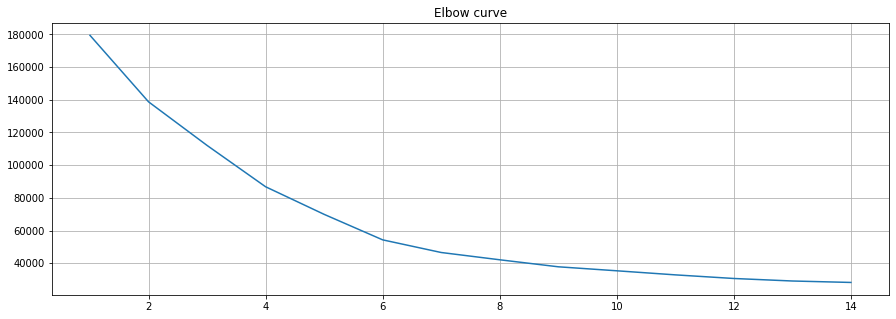

In [18]:
distorsions = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_final)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,15), distorsions)
plt.grid(True)
plt.title('Elbow curve');

**Findout the silhoutte score**

For n_clusters = 2 The average silhouette_score is : 0.28849310766634384
For n_clusters = 3 The average silhouette_score is : 0.3241080765911692
For n_clusters = 4 The average silhouette_score is : 0.34587451300413147
For n_clusters = 5 The average silhouette_score is : 0.36262134857235506
For n_clusters = 6 The average silhouette_score is : 0.3823607680635903
For n_clusters = 7 The average silhouette_score is : 0.3808995083811876
For n_clusters = 8 The average silhouette_score is : 0.35387771833977144


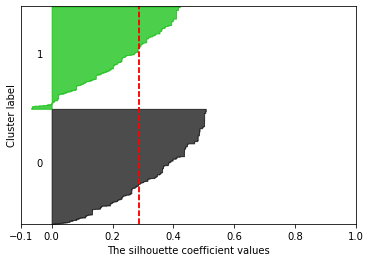

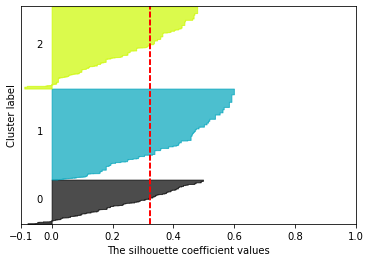

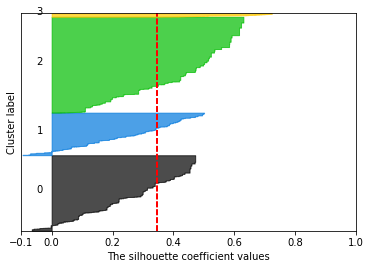

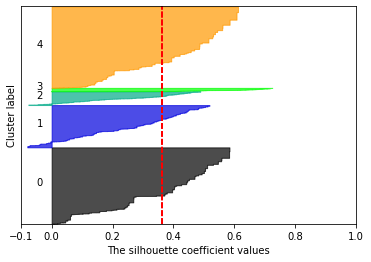

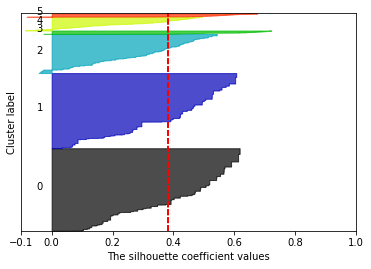

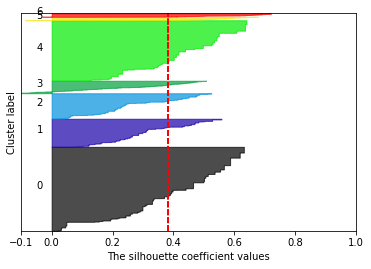

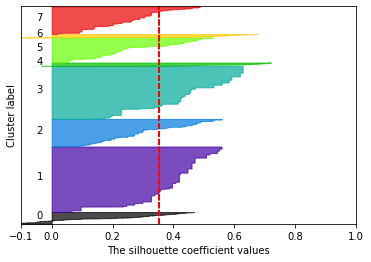

In [19]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6,7,8]
for n_clusters in range_n_clusters:
# Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data_final) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_final)
    silhouette_avg = silhouette_score(data_final, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_final, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
# The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([]) # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()  

# kmeans_clustering

In [20]:
kmeans = KMeans(n_clusters=4).fit(data_final)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
print('Attributes used for cluster model: ', scale_columns)

[[ 0.31831297  6.088121    0.06713762  0.20502805]
 [ 0.39568115 -0.10055259  0.89203325 -0.56586083]
 [ 0.44114137 -0.07929921 -0.80476852  0.47777477]
 [-1.68267615 -0.1196897  -0.02666014  0.06526338]]
[2 3 1 ... 2 2 2]
Attributes used for cluster model:  ['overall', 'main_cat', 'Month', 'Year']


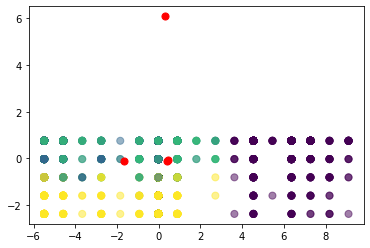

In [21]:
plt.scatter(data_final['main_cat'], data_final['overall'], c= kmeans.labels_.astype(int), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [22]:
clustered_df = data_final
clustered_df['main_cat'] = data_final['main_cat']
clustered_df['Cluster'] = kmeans.labels_
clustered_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,overall,main_cat,Month,Year,Cluster
0,0.757483,-0.019983,-1.161386,-1.081367,2
1,-0.807273,-0.019983,-1.161386,-0.309530,3
2,0.757483,-0.019983,0.201673,-0.309530,1
3,0.757483,-0.019983,-1.161386,0.462307,2
4,-0.024895,-0.019983,1.564733,-0.309530,1


# DBSCAN algorithm

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

for eps= 0.9 & min_samples= 3
eps= 0.9 & min_samples= 3 cluster count=  0     43156
 1       398
 6       268
 3       233
 8       207
 7       192
 4       144
-1        71
 2        57
 10       56
 11       13
 13       11
 12       10
 9         8
 14        4
 15        4
 16        4
 17        4
 18        4
 5         3
dtype: int64


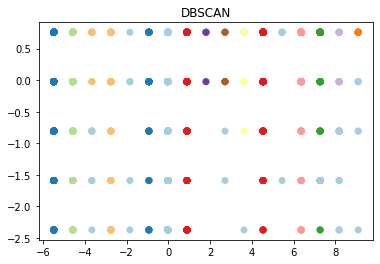

for eps= 0.9 & min_samples= 4
eps= 0.9 & min_samples= 4 cluster count=  0     43156
 1       398
 5       264
 3       232
 7       206
 6       192
 4       144
-1        88
 2        57
 9        53
 11       13
 13       11
 12        9
 8         6
 14        4
 15        4
 16        4
 17        4
 10        2
dtype: int64


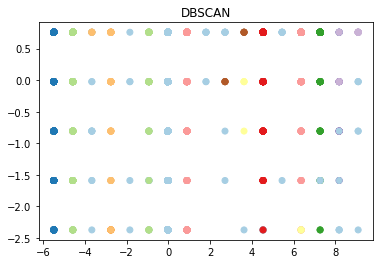

for eps= 0.9 & min_samples= 5
eps= 0.9 & min_samples= 5 cluster count=  0     43156
 1       396
 5       262
 3       230
 7       206
 6       192
 4       141
-1       116
 2        55
 9        52
 11       13
 13       10
 12        9
 8         6
 10        3
dtype: int64


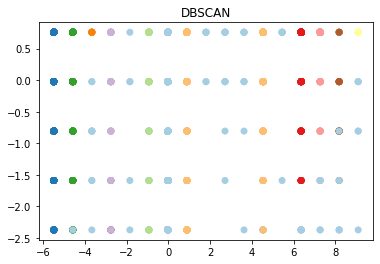

for eps= 1 & min_samples= 3
eps= 1 & min_samples= 3 cluster count=  0    44814
-1       26
 1        4
 2        3
dtype: int64


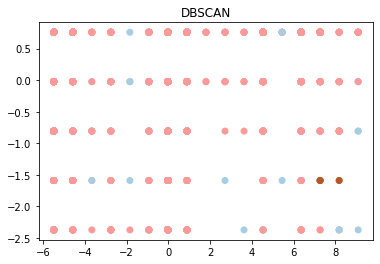

for eps= 1 & min_samples= 4
eps= 1 & min_samples= 4 cluster count=  0    44812
-1       35
dtype: int64


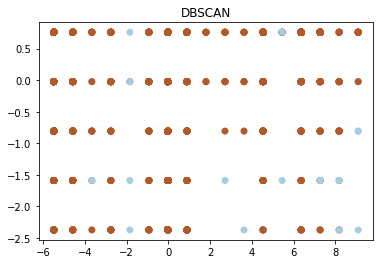

for eps= 1 & min_samples= 5
eps= 1 & min_samples= 5 cluster count=  0    44804
-1       36
 1        7
dtype: int64


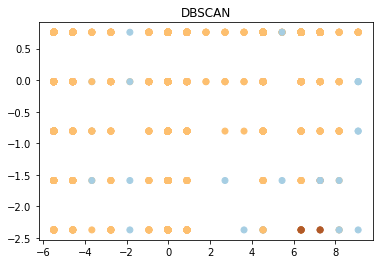

for eps= 1.2 & min_samples= 3
eps= 1.2 & min_samples= 3 cluster count=  0    44834
-1        9
 1        4
dtype: int64


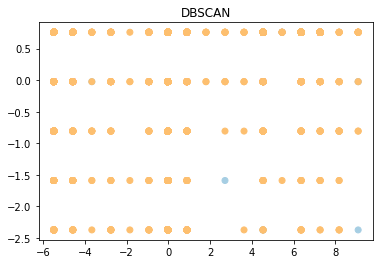

for eps= 1.2 & min_samples= 4
eps= 1.2 & min_samples= 4 cluster count=  0    44832
-1       11
 1        4
dtype: int64


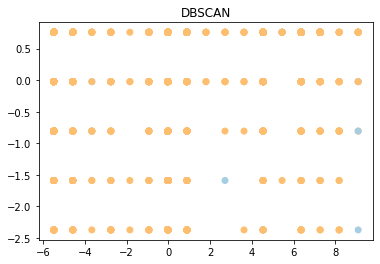

for eps= 1.2 & min_samples= 5
eps= 1.2 & min_samples= 5 cluster count=  0    44830
-1       17
dtype: int64


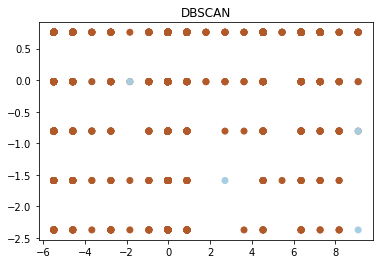

for eps= 1.3 & min_samples= 3
eps= 1.3 & min_samples= 3 cluster count=  0    44837
-1        5
 1        5
dtype: int64


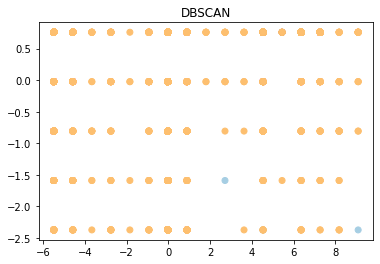

for eps= 1.3 & min_samples= 4
eps= 1.3 & min_samples= 4 cluster count=  0    44837
-1        5
 1        5
dtype: int64


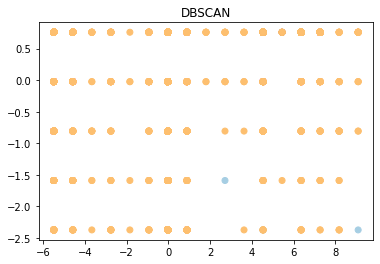

for eps= 1.3 & min_samples= 5
eps= 1.3 & min_samples= 5 cluster count=  0    44836
-1        6
 1        5
dtype: int64


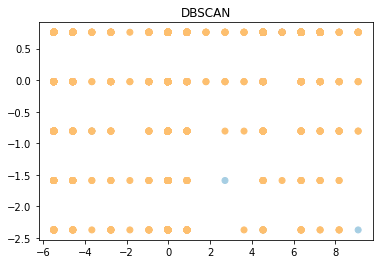

for eps= 1.4 & min_samples= 3
eps= 1.4 & min_samples= 3 cluster count=  0    44837
-1        5
 1        5
dtype: int64


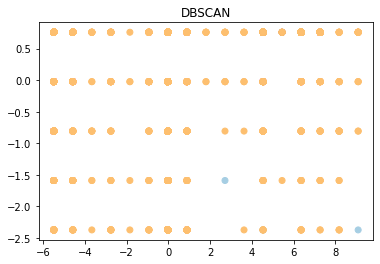

for eps= 1.4 & min_samples= 4
eps= 1.4 & min_samples= 4 cluster count=  0    44837
-1        5
 1        5
dtype: int64


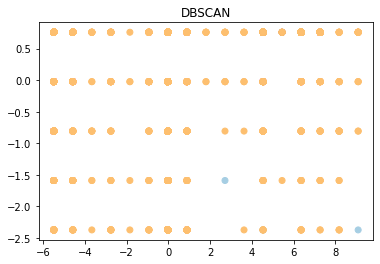

for eps= 1.4 & min_samples= 5
eps= 1.4 & min_samples= 5 cluster count=  0    44837
-1        5
 1        5
dtype: int64


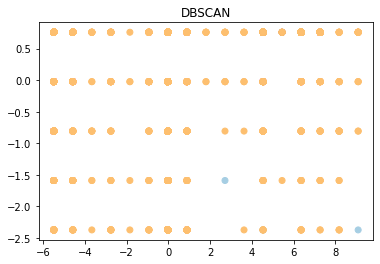

In [16]:
eps= [0.9,1,1.2,1.3,1.4]
min_samples= [3,4,5]
for x in eps:
    for y in min_samples:
        dbscan =DBSCAN(eps=x, min_samples=y) 
        y_pred= dbscan.fit_predict(data_final)
        dt = pd.DataFrame(y_pred)
        print('for eps=',x,'&','min_samples=',y)
        print('eps=',x,'&','min_samples=',y,'cluster count=',dt.value_counts())
        plt.scatter(data_final['main_cat'],data_final['overall'],c=y_pred, cmap='Paired') 
        plt.title("DBSCAN")
        plt.show()

In [17]:
eps= 0.9
min_samples= 3
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
data_final['clusterid'] = dbscan.fit_predict(data_final)
data_final.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,overall,main_cat,Month,Year,clusterid
0,0.757483,-0.019983,-1.161386,-1.081367,0
1,-0.807273,-0.019983,-1.161386,-0.309530,0
2,0.757483,-0.019983,0.201673,-0.309530,0
3,0.757483,-0.019983,-1.161386,0.462307,0
4,-0.024895,-0.019983,1.564733,-0.309530,0


Text(0.5, 1.0, 'DBSCAN')

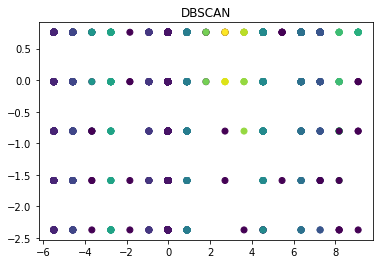

In [18]:
y_pred=data_final['clusterid'] 
plt.scatter(data_final['main_cat'],data_final['overall'],c=y_pred) 
plt.title("DBSCAN")

# Hdbscan

In [1]:
!pip install hdbscan

In [2]:
import hdbscan
import numpy as np 

In [19]:
clusters=[]
outliers=[]
min_sample=[30,40,50,60,70,10,20,15]
for x in min_sample:
    clusterer_label = hdbscan.HDBSCAN(min_cluster_size=x).fit_predict(data_final)
    a,b=np.unique(clusterer_label,return_counts=True)
    print('For:',x)
    clusters.append(len(a))
    print('no of clusters formed are',len(a))
    if (a[0]==-1):
        outliers.append(b[0])
        print('no of outliers is',b[0])

For: 30
no of clusters formed are 233
no of outliers is 1393
For: 40
no of clusters formed are 208
no of outliers is 1496
For: 50
no of clusters formed are 192
no of outliers is 2332
For: 60
no of clusters formed are 179
no of outliers is 2855
For: 70
no of clusters formed are 161
no of outliers is 2541
For: 10
no of clusters formed are 360
no of outliers is 969
For: 20
no of clusters formed are 263
no of outliers is 922
For: 15
no of clusters formed are 288
no of outliers is 716


In [20]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, gen_min_span_tree=True) 
clusterer.fit(data_final)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=15)

/usr/local/lib/python3.7/dist-packages/hdbscan/plots.py:383: UserWarning: Infinite lambda values encountered in chosen clusters. This might be due to duplicates in the data.
  warn('Infinite lambda values encountered in chosen clusters.'


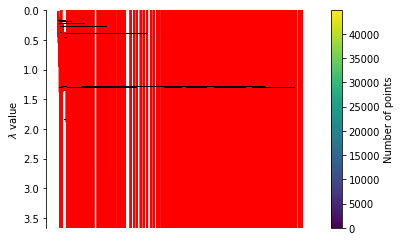

In [22]:
import seaborn as sns
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())